**Hackathon**

In [ ]:
#numpy is a library for adding support for large, multi-dimensional arrays and matrices.
#pandas is a library used for data manipulation and analysis
#matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
#seaborn is a Python data visualization library based on matplotlib,It provides a high-level interface for drawing attractive and informative statistical graphics.
#sklearn features various classification and regression algorithms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/hackathon/heart.csv")

In [8]:
#Displays the first ten entries of the datasets
df.head(n=5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df.isnull().sum()
#we have a clean dataset without any null values
#clean dataset would generate and predict results in a very precise manner.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [15]:
#splitting of data into training and testing data.
#training data-67.77% of original data in the datasets.
#testing data-33.33% of original data in the datasets.
x_train, x_test, y_train, y_test = train_test_split(df.loc[:,:'slope'],df['target'], test_size=0.33, random_state=42)


In [16]:
#displaying X_test data used for testing purpose
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
527,62,0,0,124,209,0,1,163,0,0.0,2
359,53,0,2,128,216,0,0,115,0,0.0,2
447,55,1,0,160,289,0,0,145,1,0.8,1
31,50,0,1,120,244,0,1,162,0,1.1,2
621,48,1,0,130,256,1,0,150,1,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
601,46,1,0,140,311,0,1,120,1,1.8,1
728,46,1,0,140,311,0,1,120,1,1.8,1
478,39,1,2,140,321,0,0,182,0,0.0,2
896,59,1,3,178,270,0,0,145,0,4.2,0


In [14]:
y_test

527    1
359    1
447    0
31     1
621    0
      ..
601    0
728    0
478    1
896    1
228    1
Name: target, Length: 339, dtype: int64

In [17]:
#importing LogisiticRegression from sklearn library
from sklearn.linear_model import LogisticRegression

In [18]:
#creation of LogisticRegression Model 
model=LogisticRegression()

In [22]:
#fiting the Training Data(X_train,Y_train) into the logisiticRegression Model
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [24]:
#Generation of predicted data as an output based on X_test which is provided as the input
y_pred=model.predict(x_test)

In [25]:
#Generation of ModelScore for above generatedModel
LogRegScore = round(model.score(x_test, y_test), 2)*100
print('model score: '+str(LogRegScore))

model score: 76.0


In [26]:
#Generation of Accuracy Score for the Above generated Model
accuracy_val=accuracy_score(y_test,y_pred)

In [27]:
res=accuracy_val*100
print('the accuracy of the model is: '+str(res))

the accuracy of the model is: 75.81120943952803


**R2 Score and Mean Squared Error**

In [28]:
#The Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares.
#It corresponding to the expected value of the squared error loss.
#r2_score defines the proportion of the variance in the dependent variable that is predictable from the independent variable(s) present in the datset
from sklearn.metrics import r2_score,mean_squared_error
print('R2_Score: ',r2_score(y_test,y_pred))
print('mean_squared_error: ',mean_squared_error(y_test,y_pred))

R2_Score:  0.03237259816207183
mean_squared_error:  0.24188790560471976


**Decision Classifier**

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [30]:
#Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.
#It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.


from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

In [31]:
#generating the model of type DecisionTreeClassifier
#we are fiiting the model for training the data from the datasets
#67.77% of training data and 33.33% of testing data
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
#Creation of Confusion Matrix
#confusion matrix is a 2*2 matrix which has true negative,false positive,false negative and true positive
#true predictions is sum of true negative and true positive
#false predicitons is the sum of false positive and false negative
#in our case the count of true prediciton is 333 and false prediciton is 6
prediction=model.predict(x_test)
cm2=confusion_matrix(y_test,prediction) 
print('confusion matrix')
cm2

confusion matrix


array([[171,   0],
       [  9, 159]])

In [33]:
#accuracy of the model is determined over here
accuracy_model = accuracy_score(y_test,prediction)
print('the accuracy score: ',str(accuracy_model*100))

the accuracy score:  97.34513274336283


**Feature scaling**

In [34]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**Random Forest Algorithm**

{'bootstrap': False, 'max_features': 0.2, 'n_estimators': 20}
0.9708346556648684


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


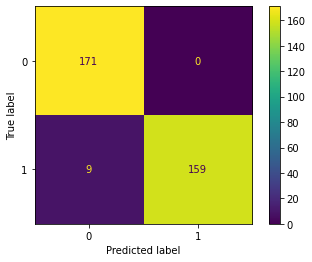

In [42]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
# knn_pipe = Pipeline([('mms', MinMaxScaler()),
#                      ('knn', KNeighborsClassifier())])
rfc = RandomForestClassifier()

#forest_params = [{'n_estimators':[1,2,5,10,20,50,55,60,65,80,75,78], 'max_features':[0.2,0.4,0.6,0.8,1]}]
forest_params = [{'n_estimators':[1,2,5,10,20,50,55,57,58,60,65], 'max_features':[0.2,0.4,0.6,0.8,1],'bootstrap':[True,False]}]
#forest_params = [{'n_estimators':[0,100,200,300,400,500], 'max_features':[0.2,0.4,0.8,1],'bootstrap':[True,False]}]
clf = GridSearchCV(rfc, forest_params)

clf.fit(x_train, y_train)

print(clf.best_params_)
print(clf.best_score_)
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()

  

In [43]:
#Creating the Confusion matrix  for random forest classifier
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
print('confusion matrix:\n',cm)

confusion matrix:
 [[123  48]
 [ 34 134]]


In [44]:
#y_pred= classifier.predict(x_test)  
acv=accuracy_score(y_test,y_pred)
print('Accuracy Score: ',acv*100)

Accuracy Score:  75.81120943952803


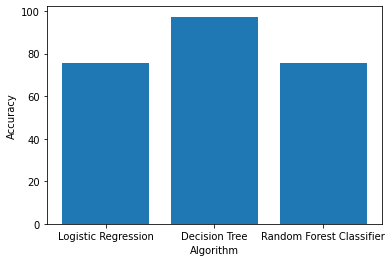

In [45]:
res2 = accuracy_model*100
res3 = acv*100
x = ['Logistic Regression','Decision Tree','Random Forest Classifier']
y = [res,res2,res3]
plt.bar(x,y)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()